1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [9]:
def int_to_chr(x):
    return chr(x + 48) if x < 10 else chr(x + 55)

def chr_to_int(x):
    return ord(x) - 48 if ord(x) < 65 else ord(x) - 55

def convert(number, base_from, base_to):
    # base-36 uses Z as biggest digit, for base-37 we run out of letters!
    assert base_from < 37 and base_to < 37, "Base too large!"
    # conversion from base=base_from to base=10
    number = str(number).upper()
    number_base_10 = 0
    for digit in number:
        digit = chr_to_int(digit)
        assert digit < base_from, "Found digit outside base!"
        number_base_10 = number_base_10 * base_from + digit
    
    # conversion from base=10 to base=base_to, by successive integer div
    result = ''
    while number_base_10:
        result += int_to_chr(number_base_10 % base_to)
        number_base_10 //= base_to
    
    # return remainders in reversed order
    return result[::-1]

convert("2aa4", 16, 2)

'10101010100100'

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [4]:
def sp_float(word):
    assert len(word) == 32, f"Not 32 bits! len(word) = {len(word)}"

    sign = word[:1]
    exponent = word[1:9]
    mantissa = word[9:]

    base = 1
    for idx, bit in enumerate(mantissa):
        base += int(bit, 2) / 2**(idx + 1)

    return (-1)**int(sign) * base * 2**(int(exponent, 2) - 127)

sp_float('10110100111000110011100111001100')

-4.232409764881595e-07

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [34]:
import math as m

a, b = 1, 0.5
i = 0
while (b < a):
    a, b = b, b / 2
    i += 1
print(f"Underflow limit = {pow(2, -i + 1)}")

c, d = 1, 2
i = 0
while (True):
    try:
        d / 2 > c
    except:
        break
    c, d = d, d * 2
    i += 1
print(f"Overflow limit = {pow(2, i)}")

Underflow limit = 5e-324
Overflow limit = 179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [1]:
a, b = 1, 1.5
n = 1
while (a != b):
    n += 1
    a, b = b, b + 1 / pow(2, n)
print(f"Machine precision = 2^(-{n - 1}) = {1 / pow(2, n - 1)}")

Machine precision = 2^(-53) = 1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that computes the roots of a quadratic equation accurately in all cases

In [3]:
import math as m

def classic_quadratic(a, b, c):
    x1 = -0.5 * b / a
    x2 = 0.5 * m.sqrt(b**2 - 4 * a * c) / a
    return x1 + x2, x1 - x2

def other_quadratic(a, b, c):
    pref = -4 * a * c
    delta = m.sqrt(b**2 - 4 * a * c)
    return pref / (b + delta), pref / (b - delta)

# first, note that the product of the two roots is c / a
def best_quadratic(a, b, c):
    assert a != 0, "This is not a quadratic equation! a is 0"

    # simple cases
    if (b == 0):
        assert c / a <= 0, "No real solution"
        root = m.sqrt(-c / a)
        return root, -root
    if (c == 0):
        return 0, -c / a

    # normal case
    try:
        delta = m.sqrt(b**2 - 4 * a * c)
    except:
        print("No real solution!")
        return None
    # avoid subtraction
    if (b < 0):
        root = 0.5 * (-b + delta) / a
    else:
        root = 0.5 * (-b - delta) / a

    return root, c / (a * root)

print(f"Classic formula --> {classic_quadratic(0.001, 1000, 0.001)}")
print(f"Other formula   --> {other_quadratic(0.001, 1000, 0.001)}")
print(f"Best version    --> {best_quadratic(0.001, 1000, 0.001)}")


Classic formula --> (-1.00000761449337e-06, -999999.999999)
Other formula   --> (-2.000000000002e-09, -2000.0211510250112)
Best version    --> (-999999.999999, -1.000000000001e-06)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{df}{dx} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

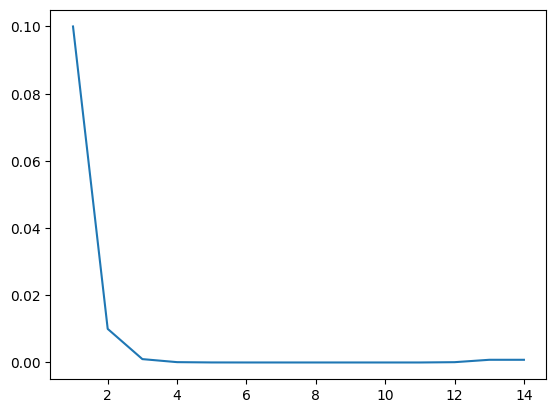

Best result is for delta = 1e-08


In [37]:
import matplotlib.pyplot as plt

def f(x):
    return x * (x - 1)

# analytical derivative
def dfdx(x):
    return 2 * x - 1

def deriv(f, x, delta):
    return (f(x + delta) - f(x)) / delta

x0 = 1
exact = dfdx(x0)
error = [abs(deriv(f, x0, 10**(-d)) / exact - 1) for d in range(1, 15)]

plt.plot(range(1, 15), error)
plt.show()

print(f"Best result is for delta = {10**(-1 - error.index(min(error)))}")

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt{1-x^2} \, dx
$$
which it's known to be $I=\pi/2=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k$-th slice.

(a) Write a program to compute the integral with $N=100$. How does the result compare to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [85]:
import numpy as np

def rad(x):
    return m.sqrt(1 - x**2)

N = 500000
x = np.linspace(-1, 1, N)
h = 2 / N

I = sum([h * (rad(a) + rad(b)) / 2 for a, b in zip(x, x[1:])])
print(f"Numerical computation with N = {N}: {I}")
print(f"Relative error: {abs(2 * I / m.pi - 1) * 100:1.2e} %")

Numerical computation with N = 500000: 1.5707931804983057
Relative error: 2.00e-04 %


#### Results
It takes approximately 1 minute and 20 seconds to compute the integral with $N = 3 \times 10^{7}$. The relative error in this case is $3.33 \times 10^{-6}\,\%$. Instead, I managed to run it in under one second with $N = 5 \times 10^{5}$: the relative error is still quite low, at $2 \times 10^{-4}$.